## Importing important libraries

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading dataset

In [153]:
df = pd.read_csv('Churn_Modelling.csv')
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
447,448,15644572,Turnbull,501,France,Male,40,4,125832.20,1,1,1,100433.83,0
9390,9391,15619130,Simpson,752,Germany,Female,37,5,113291.05,2,1,1,132467.54,0
6479,6480,15704160,Wan,648,Spain,Male,49,5,0.00,1,1,0,149946.43,1
8848,8849,15734714,Nash,559,France,Female,29,3,79715.36,1,1,0,82252.28,0
5898,5899,15713637,Chinedum,699,France,Male,34,2,117468.67,1,1,0,185227.42,0


In [154]:
# Removing RowNumber, CustomerId and Surname

df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7159,525,France,Female,59,6,55328.40,1,1,0,83342.73,1
1781,793,Spain,Female,36,0,0.00,1,0,0,148993.47,0
9227,776,France,Female,31,5,0.00,2,1,0,92647.94,0
6688,550,France,Male,22,6,154377.30,1,1,1,51721.52,0
7157,558,France,Male,32,10,105000.23,1,1,0,190019.61,0


In [155]:
df.shape

(10000, 11)

In [156]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [157]:
# Creating dummy variables for columns Geography and Gender

df = pd.get_dummies(data=df, columns = ['Geography', 'Gender'])
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [158]:
df.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Female          uint8
Gender_Male            uint8
dtype: object

In [159]:
df['Tenure'].values

array([2, 1, 8, ..., 7, 3, 4], dtype=int64)

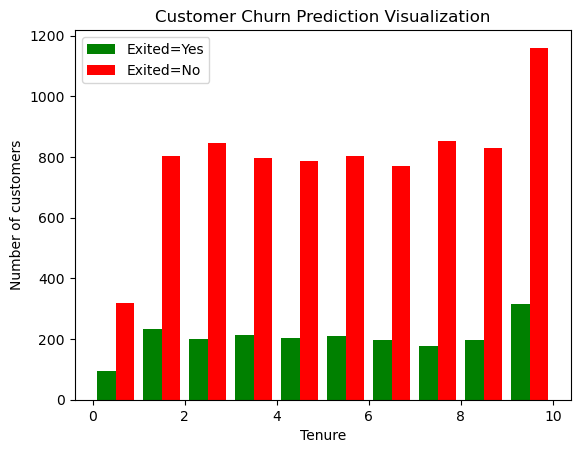

In [160]:
df['Exited'] = df['Exited'].astype(int)

# Filter the DataFrame based on the 'Exited' column values
tenure_exited_no = df[df['Exited'] == 0]['Tenure']
tenure_exited_yes = df[df['Exited'] == 1]['Tenure']

# Plot the histogram
plt.xlabel("Tenure")
plt.ylabel("Number of customers")
plt.title("Customer Churn Prediction Visualization")

# Create the histogram
plt.hist([tenure_exited_yes, tenure_exited_no], color=['green', 'red'], label=['Exited=Yes', 'Exited=No'])
plt.legend()

# Show the plot
plt.show()

In [161]:
df['Age'].values

array([42, 41, 42, ..., 36, 42, 28], dtype=int64)

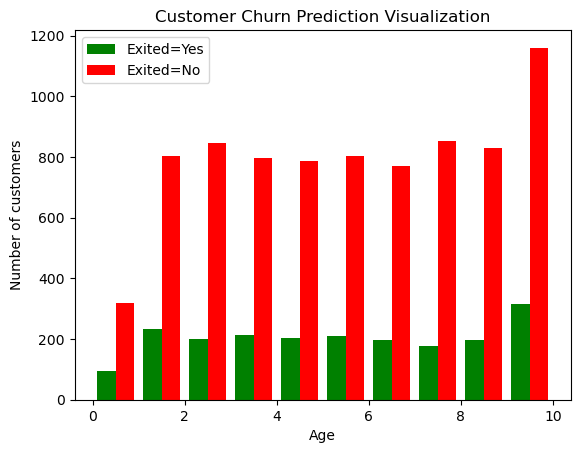

In [162]:
df['Exited'] = df['Exited'].astype(int)

# Filter the DataFrame based on the 'Exited' column values
age_exited_no = df[df['Exited'] == 0]['Tenure']
age_exited_yes = df[df['Exited'] == 1]['Tenure']

# Plot the histogram
plt.xlabel("Age")
plt.ylabel("Number of customers")
plt.title("Customer Churn Prediction Visualization")

# Create the histogram
plt.hist([age_exited_yes, age_exited_no], color=['green', 'red'], label=['Exited=Yes', 'Exited=No'])
plt.legend()

# Show the plot
plt.show()

In [163]:
df['Balance'].values

array([     0.  ,  83807.86, 159660.8 , ...,      0.  ,  75075.31,
       130142.79])

In [164]:
df.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int32
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Female          uint8
Gender_Male            uint8
dtype: object

In [165]:
df['EstimatedSalary'].values

array([101348.88, 112542.58, 113931.57, ...,  42085.58,  92888.52,
        38190.78])

In [166]:
df['NumOfProducts'].values

array([1, 1, 3, ..., 1, 2, 1], dtype=int64)

## Scaling the dataset

In [167]:
cols_to_scale = ['Tenure', 'Balance', 'EstimatedSalary', 'NumOfProducts', 'CreditScore']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [168]:
df.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6181,0.440,39,1.0,0.516843,0.333333,1,0,0.402742,0,1,0,0,0,1
663,0.690,46,0.4,0.000000,0.333333,1,1,0.687694,0,1,0,0,0,1
8172,0.818,31,0.8,0.000000,0.333333,1,1,0.495423,0,0,0,1,0,1
2693,0.624,34,0.2,0.000000,0.333333,0,1,0.107439,0,1,0,0,0,1
8141,0.272,24,0.1,0.000000,0.000000,1,0,0.494003,0,0,0,1,0,1


## Separating dependant and independant variables

In [169]:
X = df.drop('Exited', axis = 'columns')
y = df['Exited']

In [170]:
X.shape 

(10000, 13)

In [171]:
y.shape

(10000,)

## Splitting training and testing data

In [188]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 100)

In [189]:
X_train.shape

(8000, 13)

In [190]:
X_test.shape

(2000, 13)

## Hyperparameter tuning 

In [191]:
# Example of hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],              # Penalty ('l1' for Lasso, 'l2' for Ridge)
    'solver': ['liblinear', 'lbfgs']      # Solver algorithm
}

# Initialize the logistic regression model
model = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator found by GridSearchCV
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.8065
Confusion Matrix:
[[1540   48]
 [ 339   73]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1588
           1       0.60      0.18      0.27       412

    accuracy                           0.81      2000
   macro avg       0.71      0.57      0.58      2000
weighted avg       0.78      0.81      0.76      2000



## Training the model

In [192]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [193]:
model.fit(X_train, y_train)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Making Predictions

In [194]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

## Model evaluation

In [196]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.805
Confusion Matrix:
[[1531   57]
 [ 333   79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      1588
           1       0.58      0.19      0.29       412

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.77      0.81      0.76      2000



## Saving the model

In [197]:
import joblib

In [200]:
joblib.dump(model,'churn_model_joblib')

['churn_model_joblib']

In [202]:
mj = joblib.load('churn_model_joblib')

In [210]:
prediction = mj.predict([[0.440, 39, 1.0, 0.516843, 0.333333, 1, 0, 0.402742, 0, 0, 0, 1, 0]])
prediction

D:\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [211]:
if prediction == 0:
    print("Customer will not exit")
else:
    print("Customer will exit")

Customer will not exit
